# <h1><center>Indian General Election Modelling</center></h1>
## Predicting voting patterns based on demographics at the District Level

#### Importing Packages

In [149]:
import pandas as pd
import numpy as np
import math as m
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import plotly.figure_factory as ff
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.svm import SVC
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import make_scorer # Import scorer for use in cross-validation scoring (weighted accuracy)
from sklearn.model_selection import cross_val_score # uses K-fold cross-val by default.
from sklearn.metrics import make_scorer # Import scorer for use in cross-validation scoring (weighted accuracy)
import warnings # Remove Warning print statements
import geopandas as gpd
warnings.filterwarnings('ignore') # Ignore

#### Importing Preprocessed Datasets


In [150]:
#Importing training and testing datasets
election_data = pd.read_csv('/Users/ridhitbhura/Desktop/ElectionForecastProject/finalfinaldata.csv')
test_data = pd.read_csv('/Users/ridhitbhura/Downloads/DemographicData.csv')

In [151]:
del election_data['Unnamed: 0']

In [152]:
nda_data = election_data[election_data['topparty'] == 1]
upa_data = election_data[election_data['topparty'] == 2]

## Task 1 : Partition dataset into training and validation sets 

In [153]:
#using Holdout method
#data for regression
nda_x_train, nda_x_val, nda_y_train, nda_y_val = train_test_split(nda_data.iloc[:,:-4], nda_data['nda_voteshare'], test_size = 0.25, random_state=0)
upa_x_train, upa_x_val, upa_y_train, upa_y_val = train_test_split(upa_data.iloc[:,:-4], upa_data['upa_voteshare'], test_size = 0.25, random_state=0)
#demo_x_train.head()
#repub_x_train.iloc[:,3:]

In [154]:
#data for classification
x_train, x_val, y_train, y_val = train_test_split(election_data.iloc[:,:-3], election_data['topparty'], test_size = 0.25, random_state=0)
#x_train.count()

In [155]:
#data for clustering
data_x = election_data.iloc[:,:-4]
#x_train.head()
data_y = election_data['topparty']
#y_train

## Task 2 : Standardizing training and validation sets

In [156]:
scaler = StandardScaler()
scaler.fit(nda_x_train.iloc[:,4:])
nda_x_train_scaled = scaler.transform(nda_x_train.iloc[:,4:])
nda_x_train_scaled = pd.DataFrame(nda_x_train_scaled)
nda_x_val_scaled = scaler.transform(nda_x_val.iloc[:,4:])
nda_x_val_scaled = pd.DataFrame(nda_x_val_scaled)
nda_x_train_scaled.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,-0.432006,0.432006,0.057941,1.116942,-0.669930,1.151723,-0.511958,-0.529077,-0.252437,1.484156,-0.289425,-0.508556,0.508556,0.168994,0.233121,0.165515,-0.057889,0.106435
1,0.226051,-0.226051,-1.826929,-0.499841,-0.023676,0.021239,0.599908,-0.384387,-0.246507,-0.456041,-0.288973,-0.780224,0.780224,-0.662351,-1.532928,-1.573002,-1.633653,-1.114913
2,1.748193,-1.748193,-0.785492,1.250203,-0.149937,1.179115,-0.444485,-0.614861,-0.253060,0.947523,-0.288790,-0.698903,0.698903,-1.112244,-1.121689,-1.129688,-0.898179,-0.397685
3,-0.977936,0.977936,0.827505,-0.800536,-0.642682,0.615067,-0.476937,-0.471533,-0.109914,1.005292,-0.283381,1.294637,-1.294637,-1.148857,0.872587,0.327186,1.477113,2.504274
4,-0.546861,0.546861,-0.903847,-0.562070,1.036076,0.941841,-0.611343,-0.596903,-0.251527,0.087041,-0.287832,-1.213887,1.213887,-0.231035,-0.932975,-1.093395,-0.937403,-0.988463


In [157]:
scaler = StandardScaler()
scaler.fit(upa_x_train.iloc[:,4:])
upa_x_train_scaled = scaler.transform(upa_x_train.iloc[:,4:])
upa_x_train_scaled = pd.DataFrame(upa_x_train_scaled)
upa_x_val_scaled = scaler.transform(upa_x_val.iloc[:,4:])
upa_x_val_scaled = pd.DataFrame(upa_x_val_scaled)

In [158]:
scaler = StandardScaler()
scaler.fit(x_train.iloc[:,4:])
x_train_scaled = scaler.transform(x_train.iloc[:,4:])
x_train_scaled = pd.DataFrame(x_train_scaled)
x_val_scaled = scaler.transform(x_val.iloc[:,4:])
x_val_scaled = pd.DataFrame(x_val_scaled)

In [159]:
scaler = StandardScaler()
scaler.fit(data_x.iloc[:,4:])
data_x_scaled = scaler.transform(data_x.iloc[:,4:])
data_x_scaled = pd.DataFrame(data_x_scaled)

In [160]:
scaler = StandardScaler()
scaler.fit(test_data.iloc[:,5:])
test_data_scaled = scaler.transform(test_data.iloc[:,5:])
test_data_scaled = pd.DataFrame(test_data_scaled)

### Linear Regression Model - NDA Alliance

#### General Model - Including All Attributes

In [161]:
model = linear_model.LinearRegression()
fitted_model = model.fit(X = nda_x_train_scaled, y = nda_y_train)
print("Coefficients are : ",fitted_model.coef_)
print("\nIntercept is : ",fitted_model.intercept_)

Coefficients are :  [-5.85606325e+17 -5.85606325e+17 -6.35227723e+04 -2.16220895e+04
 -5.39014300e+04  1.30094820e+05  1.89961407e+04  2.99301681e+04
  1.61379166e+04  2.62710043e+04  3.84304587e+04  5.29708264e+14
  5.29708264e+14  5.39861449e+04  7.17402051e+03  8.77571135e+04
 -5.40217712e+04  5.87596400e+04]

Intercept is :  205391.2905149829


In [162]:
predicted = fitted_model.predict(nda_x_val_scaled)
predicted[predicted < 0] = 0   #handling negative predicted votes
print(predicted[:20])

[ 71277.63860919 224417.36598428 389635.98483053 374506.94173367
 356305.10734569 256542.40680153  99446.25040377 204449.49426225
 338256.02013512 365410.92237881 250847.8199163  259795.80832689
 172651.10863448 391850.48077322 299248.34761219      0.
 176730.73187799      0.         354226.33184035 370060.89826391]


In [163]:
corr_coef = np.corrcoef(predicted,nda_y_val)[1,0]
print("Coefficient of Correlation = ",corr_coef)
R_squared = corr_coef ** 2
print("R square = ",R_squared)
adj_R_squared =1 - (1 - R_squared)*(len(nda_y_val)-1)/(len(nda_y_val)-len(nda_x_train_scaled.columns-1))
print("Adjusted R square = ",adj_R_squared)

Coefficient of Correlation =  0.6115939693718329
R square =  0.37404718337199444
Adjusted R square =  -0.251905633256011


In [164]:
#print(np.sqrt(np.mean((demo_y_val-predicted)**2)))
rmse = m.sqrt(mean_squared_error(nda_y_val, predicted))
print("Root mean square error(RMSE) = ",rmse)

Root mean square error(RMSE) =  138002.29285005265


#### Optimising through Attribute Selection

In [165]:
nda_cols = [0,6,9,11]

In [166]:
model = linear_model.LinearRegression()
nda_fitted_model = model.fit(X = nda_x_train_scaled.iloc[:,nda_cols], y = nda_y_train)
print("Coefficients are : ",nda_fitted_model.coef_)
print("\nIntercept is : ",nda_fitted_model.intercept_)

Coefficients are :  [-43118.69934849 -26097.95179565  52528.27785551   4880.69692647]

Intercept is :  206471.35576923063


In [167]:
predicted = nda_fitted_model.predict(nda_x_val_scaled.iloc[:, nda_cols])
predicted[predicted < 0] = 0

In [168]:
corr_coef = np.corrcoef(predicted,nda_y_val)[1,0]
print("Coefficient of Correlation = ",corr_coef)
R_squared = corr_coef ** 2
print("R square = ",R_squared)
adj_R_squared =1 - (1 - R_squared)*(len(nda_y_val)-1)/(len(nda_y_val)-len(nda_x_train_scaled.iloc[:, nda_cols].columns-1))
print("Adjusted R square = ",adj_R_squared)

Coefficient of Correlation =  0.2783835444177674
R square =  0.07749739780259908
Adjusted R square =  -0.011777047571343013


#### Optimising through LASSO regression 

In [169]:
model = linear_model.Lasso(alpha = 1)
fitted_model = model.fit(X = nda_x_train_scaled, y = nda_y_train)
predicted = fitted_model.predict(nda_x_val_scaled)
predicted[predicted < 0] = 0
print("Coefficients are : ",fitted_model.coef_)
print("\nIntercept is : ",fitted_model.intercept_)
corr_coef = np.corrcoef(predicted, nda_y_val)[1, 0]
print("\nCoefficient of Correlation = ",corr_coef)
R_squared = corr_coef**2
print("R square = ",R_squared)
adj_R_squared =1 - (1 - R_squared)*(len(nda_y_val)-1)/(len(nda_y_val)-len(nda_x_train_scaled.iloc[:, nda_cols].columns-1))
print("Adjusted R square = ",adj_R_squared)
rmse = m.sqrt(mean_squared_error(nda_y_val, predicted))
print("\nRoot mean square error(RMSE) = ",rmse)

Coefficients are :  [ 9.95114898e+02 -2.59471842e-09 -6.40322874e+04 -2.19435965e+04
 -5.38507133e+04  1.31151247e+05  1.94191274e+04  3.01576341e+04
  1.59598638e+04  2.62052525e+04  3.88776558e+04 -2.54510196e+04
  5.19391436e-10  5.41799310e+04  7.71656026e+03  8.80071567e+04
 -5.37714426e+04  5.90213165e+04]

Intercept is :  206471.35576923072

Coefficient of Correlation =  0.610167247444938
R square =  0.3723040698545322
Adjusted R square =  0.31155930242109975

Root mean square error(RMSE) =  138451.09581270014


### Linear Regression Model - UPA Alliance

#### General Model - Including All Attributes

In [170]:
model = linear_model.LinearRegression()
fitted_model = model.fit(X = upa_x_train_scaled, y = upa_y_train)
print("Coefficients are : ",fitted_model.coef_)
print("\nIntercept is : ",fitted_model.intercept_)

Coefficients are :  [ 8.56640775e+18  8.56640775e+18 -5.84107732e+04 -1.92871069e+04
  8.76413781e+04 -1.23325064e+05  1.45740502e+05 -4.94476959e+04
  3.86375957e+04 -7.58240618e+04  5.33034509e+03 -3.22106949e+17
 -3.22106949e+17  1.20140527e+04  1.58298130e+05  8.62525748e+04
 -8.24344849e+04  4.89451734e+04]

Intercept is :  187411.08531256547


In [171]:
predicted = fitted_model.predict(upa_x_val_scaled)
predicted[predicted < 0] = 0
print(predicted[:20])

[236138.91916748 109344.24686272  49206.2762794  115762.94533166
      0.              0.         243165.04646891 452648.01237936
 422985.3675216   80903.47785281 389188.78619797 226396.97525605
      0.              0.         187162.00632936  97064.30432047]


In [172]:
corr_coef = np.corrcoef(predicted,upa_y_val)[1,0]
print("Coefficient of Correlation = ",corr_coef)
R_squared = corr_coef**2
print("R square = ",R_squared)
adj_R_squared =1 - (1 - R_squared)*(len(upa_y_val)-1)/(len(upa_y_val)-len(upa_x_train_scaled.columns-1))
print("Adjusted R square = ",adj_R_squared)

Coefficient of Correlation =  0.26406287606163853
R square =  0.06972920251394427
Adjusted R square =  7.977030981145418


In [173]:
rmse = m.sqrt(mean_squared_error(upa_y_val, predicted))
print("Root mean square error(RMSE) = ",rmse)

Root mean square error(RMSE) =  161506.1082208923


#### Optimising through Attribute Selection

In [174]:
upa_cols = [0,1,6,7,8,9,10,11,12]

In [175]:
model = linear_model.LinearRegression()
upa_fitted_model = model.fit(X = upa_x_train_scaled.iloc[:,upa_cols], y = upa_y_train)
print("Coefficients are : ",upa_fitted_model.coef_)
print("\nIntercept is : ",upa_fitted_model.intercept_)

Coefficients are :  [ 5.74981815e+18  5.74981815e+18  1.77305965e+05  1.28892062e+04
  3.13797727e+04 -7.58087696e+04  3.54661654e+04 -6.57900988e+16
 -6.57900988e+16]

Intercept is :  181276.88734592134


In [176]:
predicted = upa_fitted_model.predict(upa_x_val_scaled.iloc[:, upa_cols])
predicted[predicted < 0] = 0

In [177]:
corr_coef = np.corrcoef(predicted,upa_y_val)[1,0]
print("Coefficient of Correlation = ",corr_coef)
R_squared = corr_coef**2
print("R square = ",R_squared)
adj_R_squared =1 - (1 - R_squared)*(len(upa_y_val)-1)/(len(upa_y_val)-len(upa_x_train_scaled.columns-1))
print("Adjusted R square = ",adj_R_squared)

Coefficient of Correlation =  -0.1784079171073787
R square =  0.03182938488659331
Adjusted R square =  8.26127961335055


In [178]:
#print(np.sqrt(np.mean((demo_y_val-predicted)**2)))
rmse = m.sqrt(mean_squared_error(upa_y_val, predicted))
print("Root mean square error(RMSE) = ",rmse)

Root mean square error(RMSE) =  187375.54550156236


#### Optimising through LASSO regression 

In [179]:
model = linear_model.Lasso(alpha = 1)
fitted_model = model.fit(X = upa_x_train_scaled, y = upa_y_train)
predicted = fitted_model.predict(upa_x_val_scaled)
predicted[predicted < 0] = 0
print("Coefficients are : ",fitted_model.coef_)
print("\nIntercept is : ",fitted_model.intercept_)
corr_coef = np.corrcoef(predicted, upa_y_val)[1, 0]
print("\nCoefficient of Correlation = ",corr_coef)
R_squared = corr_coef**2
print("R square = ",R_squared)
adj_R_squared =1 - (1 - R_squared)*(len(upa_y_val)-1)/(len(upa_y_val)-len(upa_x_train_scaled.columns-1))
print("Adjusted R square = ",adj_R_squared)
#print(np.sqrt(np.mean((demo_y_val-predicted)**2)))
rmse = m.sqrt(mean_squared_error(upa_y_val, predicted))
print("\nRoot mean square error(RMSE) = ",rmse)

Coefficients are :  [-7.11323626e+04  1.29698512e-07 -3.78001403e+04 -1.37581775e+04
  1.13799397e+05 -8.67036409e+04  1.89490239e+05 -6.12666351e+04
  2.80975398e+04 -7.36050733e+04  3.66397946e+04  2.37120003e+04
 -0.00000000e+00  1.34696319e+04  1.30654286e+05  1.02306017e+05
 -9.06461757e+04  6.54125820e+04]

Intercept is :  169062.1956521745

Coefficient of Correlation =  0.4009221838787006
R square =  0.16073859752606662
Adjusted R square =  7.2944605185545

Root mean square error(RMSE) =  173747.7307868493


### Classification Model

#### k-Nearest 

#### General Model - Including All Attributes

In [180]:
classifier = KNeighborsClassifier(n_neighbors = 11, weights ='distance')  
classifier.fit(x_train_scaled,y_train)

KNeighborsClassifier(n_neighbors=11, weights='distance')

In [181]:
y_pred = classifier.predict(x_val_scaled)

[[102   5   2]
 [ 10  27   0]
 [  6   2   5]]


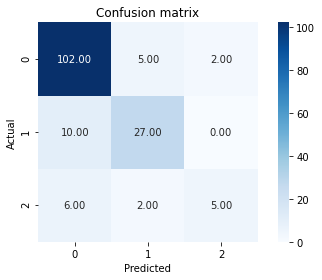

In [182]:
conf_matrix = metrics.confusion_matrix(y_val,y_pred)
sns.heatmap(conf_matrix, annot = True, fmt = ".2f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()
print(conf_matrix)

In [183]:
accuracy = metrics.accuracy_score(y_val,y_pred)
error = 1 - accuracy
precision = metrics.precision_score(y_val, y_pred, average = None)
recall = metrics.recall_score(y_val, y_pred, average = None)
F1_score = metrics.f1_score(y_val, y_pred, average = None)
print("Accuracy = ",accuracy, "\nError = ",error, "\nPrecision =",precision,"\nRecall = ", recall,"\nF1 Score = ", F1_score)

Accuracy =  0.8427672955974843 
Error =  0.1572327044025157 
Precision = [0.86440678 0.79411765 0.71428571] 
Recall =  [0.93577982 0.72972973 0.38461538] 
F1 Score =  [0.89867841 0.76056338 0.5       ]


In [184]:
#selecting optimal value of K
cols = [3,5,6,7,8,9,11,12]
for i in range(1,20):
    classifier = KNeighborsClassifier(n_neighbors = i,weights='distance')  
    classifier.fit(x_train_scaled.iloc[:,cols],y_train)
    y_pred = classifier.predict(x_val_scaled.iloc[:,cols])
    accuracy = metrics.accuracy_score(y_val,y_pred)
    error = 1 - accuracy
    precision = metrics.precision_score(y_val, y_pred, average = None)
    recall = metrics.recall_score(y_val, y_pred, average = None)
    F1_score = metrics.f1_score(y_val, y_pred, average = None)
    print([i,accuracy, error, precision, recall, F1_score])


[1, 0.7044025157232704, 0.2955974842767296, array([0.81481481, 0.66666667, 0.19047619]), array([0.80733945, 0.54054054, 0.30769231]), array([0.81105991, 0.59701493, 0.23529412])]
[2, 0.7044025157232704, 0.2955974842767296, array([0.81481481, 0.66666667, 0.19047619]), array([0.80733945, 0.54054054, 0.30769231]), array([0.81105991, 0.59701493, 0.23529412])]
[3, 0.7169811320754716, 0.28301886792452835, array([0.81651376, 0.65714286, 0.13333333]), array([0.81651376, 0.62162162, 0.15384615]), array([0.81651376, 0.63888889, 0.14285714])]
[4, 0.7358490566037735, 0.26415094339622647, array([0.80869565, 0.67647059, 0.1       ]), array([0.85321101, 0.62162162, 0.07692308]), array([0.83035714, 0.64788732, 0.08695652])]
[5, 0.7547169811320755, 0.24528301886792447, array([0.82051282, 0.6969697 , 0.11111111]), array([0.88073394, 0.62162162, 0.07692308]), array([0.84955752, 0.65714286, 0.09090909])]
[6, 0.7735849056603774, 0.2264150943396226, array([0.84347826, 0.71428571, 0.11111111]), array([0.8899

#### Testing by selecting diffferent attributes

In [185]:
KNN_cols = [3,5,6,7,8,9,11,12]
KNN_classifier = KNeighborsClassifier(n_neighbors = 9)  
KNN_classifier.fit(x_train_scaled.iloc[:,KNN_cols],y_train)

KNeighborsClassifier(n_neighbors=9)

In [186]:
y_pred = KNN_classifier.predict(x_val_scaled.iloc[:,KNN_cols])

In [187]:
accuracy = metrics.accuracy_score(y_val,y_pred)
error = 1 - accuracy
precision = metrics.precision_score(y_val, y_pred, average = None)
recall = metrics.recall_score(y_val, y_pred, average = None)
F1_score = metrics.f1_score(y_val, y_pred, average = None)
print("Accuracy = ",accuracy, "\nError = ",error, "\nPrecision =",precision,"\nRecall = ", recall,"\nF1 Score = ", F1_score)

Accuracy =  0.779874213836478 
Error =  0.22012578616352196 
Precision = [0.79230769 0.80769231 0.        ] 
Recall =  [0.94495413 0.56756757 0.        ] 
F1 Score =  [0.86192469 0.66666667 0.        ]


[[103   4   2]
 [ 15  21   1]
 [ 12   1   0]]


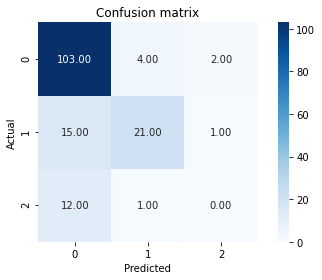

In [188]:
conf_matrix = metrics.confusion_matrix(y_val,y_pred)
sns.heatmap(conf_matrix, annot = True, fmt = ".2f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()
print(conf_matrix)

### Support Vector Machine (SVM)

#### Using all attributes

In [189]:
classifier = SVC(kernel = 'rbf', gamma = 'auto')  
classifier.fit(x_train_scaled,y_train)

SVC(gamma='auto')

In [190]:
y_pred = classifier.predict(x_val_scaled)

[[106   3   0]
 [ 12  25   0]
 [ 12   1   0]]


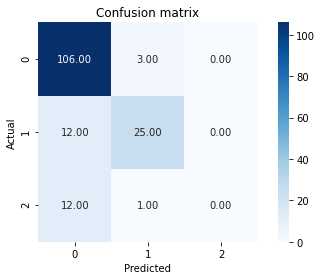

In [191]:
conf_matrix = metrics.confusion_matrix(y_val,y_pred)
sns.heatmap(conf_matrix, annot = True, fmt = ".2f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()
print(conf_matrix)

In [192]:
accuracy = metrics.accuracy_score(y_val,y_pred)
error = 1 - accuracy
precision = metrics.precision_score(y_val, y_pred, average = None)
recall = metrics.recall_score(y_val, y_pred, average = None)
F1_score = metrics.f1_score(y_val, y_pred, average = None)
print("Accuracy = ",accuracy, "\nError = ",error, "\nPrecision =",precision,"\nRecall = ", recall,"\nF1 Score = ", F1_score)

Accuracy =  0.8238993710691824 
Error =  0.17610062893081757 
Precision = [0.81538462 0.86206897 0.        ] 
Recall =  [0.97247706 0.67567568 0.        ] 
F1 Score =  [0.88702929 0.75757576 0.        ]


#### Testing by selecting diffferent attributes

In [193]:
SVM_cols = [2,3,6,7,8,9,11,12]
SVM_classifier = SVC(kernel = 'rbf', gamma = 'auto')  
SVM_classifier.fit(x_train_scaled.iloc[:,SVM_cols],y_train)

SVC(gamma='auto')

In [194]:
y_pred = SVM_classifier.predict(x_val_scaled.iloc[:,SVM_cols])

In [195]:
accuracy = metrics.accuracy_score(y_val,y_pred)
error = 1 - accuracy
precision = metrics.precision_score(y_val, y_pred, average = None)
recall = metrics.recall_score(y_val, y_pred, average = None)
F1_score = metrics.f1_score(y_val, y_pred, average = None)
print("Accuracy = ",accuracy, "\nError = ",error, "\nPrecision =",precision,"\nRecall = ", recall,"\nF1 Score = ", F1_score)

Accuracy =  0.7924528301886793 
Error =  0.2075471698113207 
Precision = [0.77941176 0.86956522 0.        ] 
Recall =  [0.97247706 0.54054054 0.        ] 
F1 Score =  [0.86530612 0.66666667 0.        ]


[[106   3   0]
 [ 17  20   0]
 [ 13   0   0]]


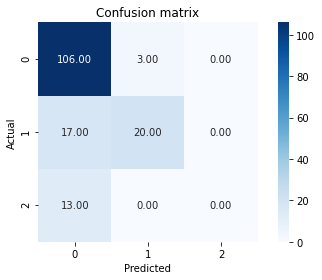

In [196]:
conf_matrix = metrics.confusion_matrix(y_val,y_pred)
sns.heatmap(conf_matrix, annot = True, fmt = ".2f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()
print(conf_matrix)

## Predicting Voting Data 

In [289]:
prediction = test_data[['State Name','District name','District_elecname','muslimpct','stpct']]

#### NDA Votes

In [290]:
predicted = nda_fitted_model.predict(test_data_scaled.iloc[:, nda_cols])

In [291]:
predicted[predicted < 0] = 0 
prediction['NDApred'] = predicted

#### UPA Votes

In [292]:
predicted = upa_fitted_model.predict(test_data_scaled.iloc[:, upa_cols])

In [293]:
predicted[predicted < 0] = 0
prediction['UPApred'] = predicted

### Predicting Using KNN Classifier Model

In [294]:
#KNN had an ~8% accuracy jump from the SVC model, hence it was used as the preferred prediction model.

In [295]:
class_pred = KNN_classifier.predict(test_data_scaled.iloc[:,KNN_cols])

In [296]:
prediction['Party'] = class_pred

In [297]:
prediction.head(10)

,State Name,District name,District_elecname,muslimpct,stpct,NDApred,UPApred,Party
0,JAMMU AND KASHMIR,Kupwara,Kupwara,0.945921,0.080831,0.000000,8.377989e+05,1
1,JAMMU AND KASHMIR,Badgam,Budgam,0.976529,0.031724,14643.801703,9.506071e+05,1
2,JAMMU AND KASHMIR,Leh(Ladakh),Leh,0.142763,0.718100,0.000000,3.261416e+05,0
3,JAMMU AND KASHMIR,Kargil,Kargil,0.768732,0.868851,0.000000,7.567209e+05,1
4,JAMMU AND KASHMIR,Punch,Poonch,0.904462,0.369312,24111.035776,8.872271e+05,1
5,JAMMU AND KASHMIR,Rajouri,Rajouri,0.627132,0.362406,40599.289862,5.266994e+05,1
6,JAMMU AND KASHMIR,Kathua,Kathua,0.104202,0.086476,143191.661545,6.728762e+04,0
7,JAMMU AND KASHMIR,Baramula,Baramulla,0.951536,0.037404,13266.426624,9.361603e+05,1
8,JAMMU AND KASHMIR,Bandipore,Bandipora,0.973929,0.192167,12453.068615,9.736100e+05,1
9,JAMMU AND KASHMIR,Srinagar,Srinagar,0.951904,0.007224,42512.208654,1.251943e+06,1


#### Joining Original Data for Spatial Comparison

In [298]:
ndadict = dict(zip(original_election_data['District_elecname'],original_election_data['nda_voteshare']))
upadict = dict(zip(original_election_data['District_elecname'],original_election_data['upa_voteshare']))

In [299]:
prediction['ndaoriginal']= prediction['District_elecname'].map(ndadict)
prediction['upaoriginal']= prediction['District_elecname'].map(upadict)

In [300]:
prediction['ndapredpct']=(prediction['NDApred'])/(prediction['NDApred']+prediction['UPApred'])
prediction['upapredpct']=(prediction['UPApred'])/(prediction['NDApred']+prediction['UPApred'])
prediction['ndaogpct']=(prediction['ndaoriginal'])/(prediction['ndaoriginal']+prediction['upaoriginal'])
prediction['upaogpct']=(prediction['upaoriginal'])/(prediction['ndaoriginal']+prediction['upaoriginal'])
prediction['margincomp']=(prediction['ndapredpct']-prediction['upapredpct'])-(prediction['ndaogpct']-prediction['upaogpct'])
#margincomp is a comparison between the predicted vote share and the actual vote share. If the value is positive,
#NDA underperformed in the actual election given the demographics and vice versa. That is, given the demographics 
#the NDA should be doing better there but is not. That implies room for future growth

In [301]:
prediction

,State Name,District name,District_elecname,muslimpct,stpct,NDApred,UPApred,Party,ndaoriginal,upaoriginal,ndapredpct,upapredpct,ndaogpct,upaogpct,margincomp
0,JAMMU AND KASHMIR,Kupwara,Kupwara,0.945921,0.080831,0.000000,837798.913459,1,2116.0,70820.0,0.000000,1.000000,0.029012,0.970988,-0.058023
1,JAMMU AND KASHMIR,Badgam,Budgam,0.976529,0.031724,14643.801703,950607.080033,1,1337.0,59645.0,0.015171,0.984829,0.021925,0.978075,-0.013507
2,JAMMU AND KASHMIR,Leh(Ladakh),Leh,0.142763,0.718100,0.000000,326141.646191,0,30967.0,19344.0,0.000000,1.000000,0.615512,0.384488,-1.231023
3,JAMMU AND KASHMIR,Kargil,Kargil,0.768732,0.868851,0.000000,756720.894033,1,10348.0,1103.0,0.000000,1.000000,0.903677,0.096323,-1.807353
4,JAMMU AND KASHMIR,Punch,Poonch,0.904462,0.369312,24111.035776,887227.063519,1,17852.0,132266.0,0.026457,0.973543,0.118920,0.881080,-0.184926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631,PONDICHERRY,PONDICHERRY,Puducherry,0.034383,0.000000,275869.057461,311982.222114,1,203122.0,332657.0,0.469284,0.530716,0.379115,0.620885,0.180337
632,PONDICHERRY,Mahe,Mahe,0.307442,0.000000,324437.867515,807595.823614,0,4746.0,12876.0,0.286597,0.713403,0.269322,0.730678,0.034550
633,PONDICHERRY,Karaikal,Karaikal,0.144015,0.000000,254852.838180,340726.630311,1,31279.0,78417.0,0.427907,0.572093,0.285143,0.714857,0.285530
634,ANDAMAN AND NICOBAR ISLANDS,Nicobars,Andaman & Nicobar Islands,0.036263,0.642772,60357.840724,0.000000,1,93772.0,95249.0,1.000000,0.000000,0.496093,0.503907,1.007814


## Mapping Results

In [302]:
#Indian Districts Shapefile
ind_dist = gpd.read_file('/Users/ridhitbhura/Desktop/Election Prediction Project/data/polbnda_ind.shp')
ind_dist = ind_dist[ind_dist['laa'].notna()]

In [303]:
mapdict = pd.read_csv('/Users/ridhitbhura/Desktop/Election Prediction Project/mapdict.csv')

In [304]:
mdict = dict(zip(mapdict['data'], mapdict['map']))

In [305]:
prediction["mapnames"] = prediction["District_elecname"].map(mdict)

In [306]:
prediction['predmargin']=prediction['ndapredpct']-prediction['upapredpct']
prediction['originalmargin']=prediction['ndaogpct']-prediction['upaogpct']

In [307]:
prediction

,State Name,District name,District_elecname,muslimpct,stpct,NDApred,UPApred,Party,ndaoriginal,upaoriginal,ndapredpct,upapredpct,ndaogpct,upaogpct,margincomp,mapnames,predmargin,originalmargin
0,JAMMU AND KASHMIR,Kupwara,Kupwara,0.945921,0.080831,0.000000,837798.913459,1,2116.0,70820.0,0.000000,1.000000,0.029012,0.970988,-0.058023,NaN,-1.000000,-0.941977
1,JAMMU AND KASHMIR,Badgam,Budgam,0.976529,0.031724,14643.801703,950607.080033,1,1337.0,59645.0,0.015171,0.984829,0.021925,0.978075,-0.013507,NaN,-0.969658,-0.956151
2,JAMMU AND KASHMIR,Leh(Ladakh),Leh,0.142763,0.718100,0.000000,326141.646191,0,30967.0,19344.0,0.000000,1.000000,0.615512,0.384488,-1.231023,LEH (LADAKH),-1.000000,0.231023
3,JAMMU AND KASHMIR,Kargil,Kargil,0.768732,0.868851,0.000000,756720.894033,1,10348.0,1103.0,0.000000,1.000000,0.903677,0.096323,-1.807353,NaN,-1.000000,0.807353
4,JAMMU AND KASHMIR,Punch,Poonch,0.904462,0.369312,24111.035776,887227.063519,1,17852.0,132266.0,0.026457,0.973543,0.118920,0.881080,-0.184926,PUNCH,-0.947087,-0.762160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631,PONDICHERRY,PONDICHERRY,Puducherry,0.034383,0.000000,275869.057461,311982.222114,1,203122.0,332657.0,0.469284,0.530716,0.379115,0.620885,0.180337,PONDICHERRY,-0.061432,-0.241769
632,PONDICHERRY,Mahe,Mahe,0.307442,0.000000,324437.867515,807595.823614,0,4746.0,12876.0,0.286597,0.713403,0.269322,0.730678,0.034550,MAHE,-0.426805,-0.461355
633,PONDICHERRY,Karaikal,Karaikal,0.144015,0.000000,254852.838180,340726.630311,1,31279.0,78417.0,0.427907,0.572093,0.285143,0.714857,0.285530,KARAIKAL,-0.144185,-0.429715
634,ANDAMAN AND NICOBAR ISLANDS,Nicobars,Andaman & Nicobar Islands,0.036263,0.642772,60357.840724,0.000000,1,93772.0,95249.0,1.000000,0.000000,0.496093,0.503907,1.007814,SOUTH ANDAMAN,1.000000,-0.007814


In [308]:
prediction = prediction[prediction['mapnames'].notna()]

In [316]:
ndadict = dict(zip(prediction['mapnames'], prediction['NDApred']))
updadict = dict(zip(prediction['mapnames'], prediction['UPApred']))
compdict = dict(zip(prediction['mapnames'], prediction['margincomp']))
predmargindict = dict(zip(prediction['mapnames'], prediction['predmargin']))
ogmargindict = dict(zip(prediction['mapnames'], prediction['originalmargin']))
muslimdict = dict(zip(prediction['mapnames'], prediction['muslimpct']))
stdict = dict(zip(prediction['mapnames'], prediction['stpct']))
ind_dist['ogmargin']= ind_dist['ogmargin']*100

In [317]:
ind_dist['nda_vote']= ind_dist["laa"].map(ndadict)
ind_dist['upa_vote']= ind_dist["laa"].map(updadict)
ind_dist['margincomp']= ind_dist["laa"].map(compdict)
ind_dist['margincomp']= ind_dist['margincomp']*100
ind_dist['predmargin']= ind_dist["laa"].map(predmargindict)
ind_dist['predmargin']= ind_dist['predmargin']*100
ind_dist['ogmargin']= ind_dist["laa"].map(ogmargindict)
ind_dist['ogmargin']= ind_dist['ogmargin']*100
ind_dist['muslimpct']= ind_dist["laa"].map(muslimdict)
ind_dist['stpct']= ind_dist["laa"].map(stdict)

Text(0.5, 1.0, 'NDA(National Democratic Alliance) Raw Votes by District (India)')

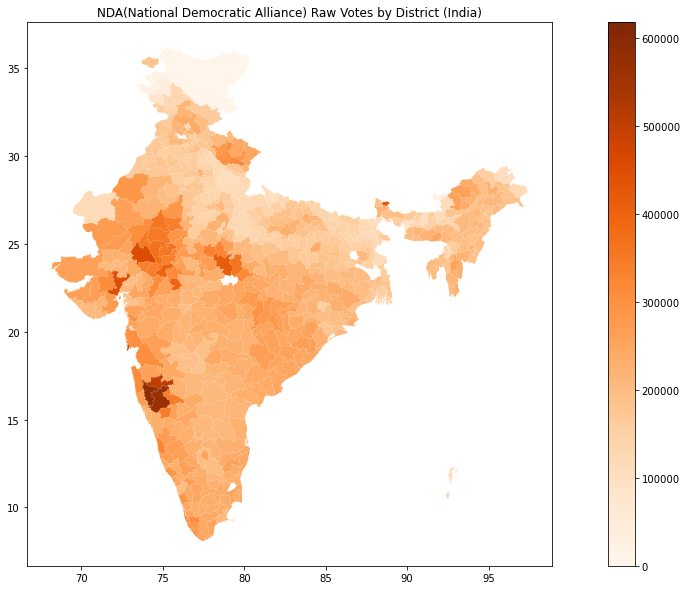

In [318]:
ind_dist.plot(figsize=(20,10), column='nda_vote', cmap='Oranges',legend=True)
plt.title('NDA(National Democratic Alliance) Raw Votes by District (India)')
#plt.savefig('/Users/ridhitbhura/Downloads/rawnda.png')

Text(0.5, 1.0, 'UPA(United Progressive Alliance) Raw Votes by District (India)')

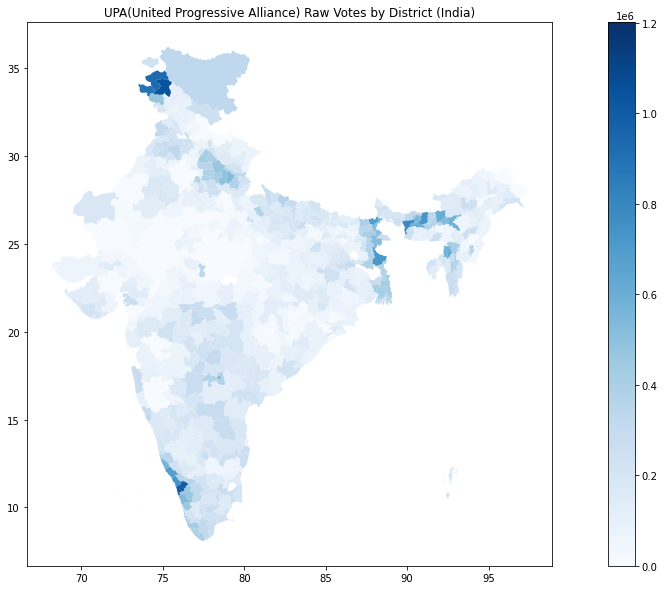

In [319]:
ind_dist.plot(figsize=(20,10), column='upa_vote', cmap='Blues',legend=True)
plt.title('UPA(United Progressive Alliance) Raw Votes by District (India)')
#plt.savefig('/Users/ridhitbhura/Downloads/rawupa.png')

Text(0.5, 1.0, 'Model Over/Under performance by %, Blue=Underperformance,Red=Oveeperformance')

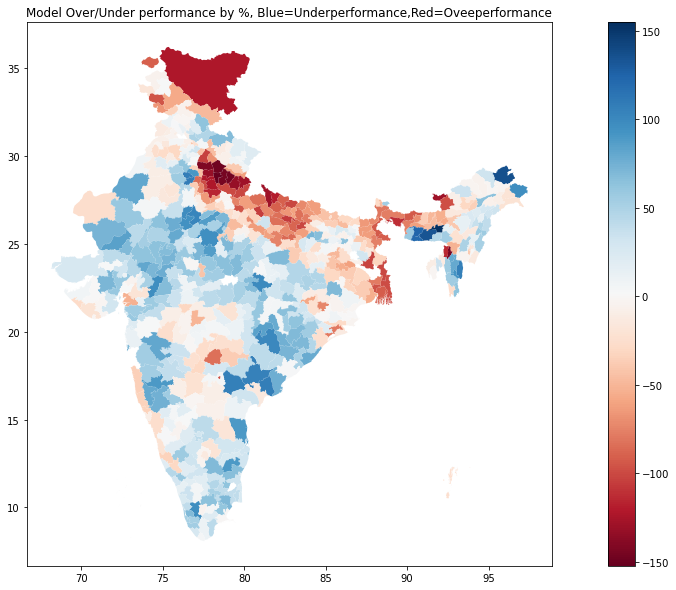

In [320]:
ind_dist.plot(figsize=(20,10), column='margincomp', cmap='RdBu',legend=True)
plt.title('Model Over/Under performance by %, Blue=Underperformance,Red=Oveeperformance')
#plt.savefig('/Users/ridhitbhura/Downloads/compmap.png')

### The map above shows how the districts would vote purely on demographics and alliances' relative performances. The areas that are redder are those where the NDA performed better in the 2019 election than they do in the model. Hence they overperform the demographics. The areas that are bluer are where the UPA performed better/NDA performed worse than they do in the model. Thus UPA overperforms while NDA underperforms the demograhics of the district. 

Text(0.5, 1.0, 'Actual Results - 2019 Election')

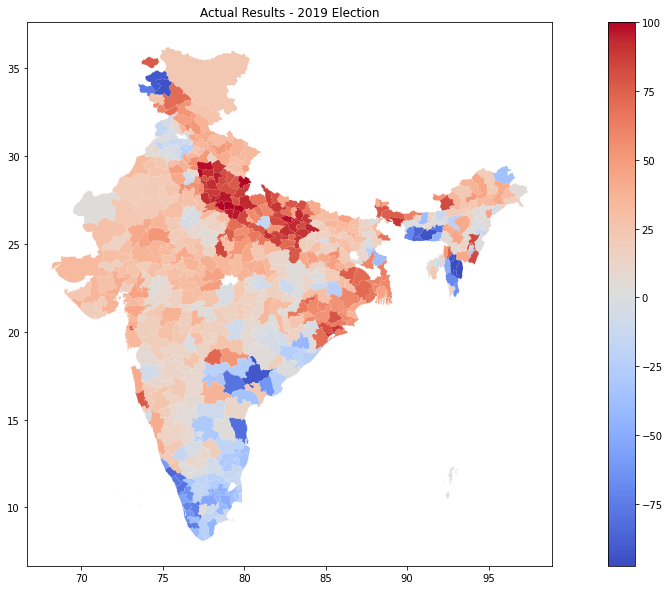

In [321]:
ind_dist.plot(figsize=(20,10), column='ogmargin', cmap='coolwarm',legend=True)
plt.title('Actual Results - 2019 Election')
#plt.savefig('/Users/ridhitbhura/Downloads/2019actual.png')

Text(0.5, 1.0, 'Predicted Results via kNN Model - 2019 Election')

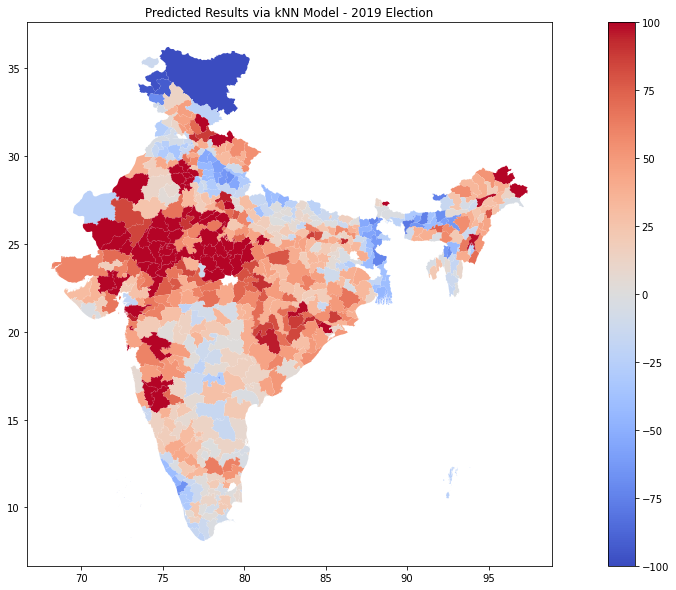

In [322]:
ind_dist.plot(figsize=(20,10), column='predmargin', cmap='coolwarm',legend=True)
plt.title('Predicted Results via kNN Model - 2019 Election')
#plt.savefig('/Users/ridhitbhura/Downloads/2019pred.png')


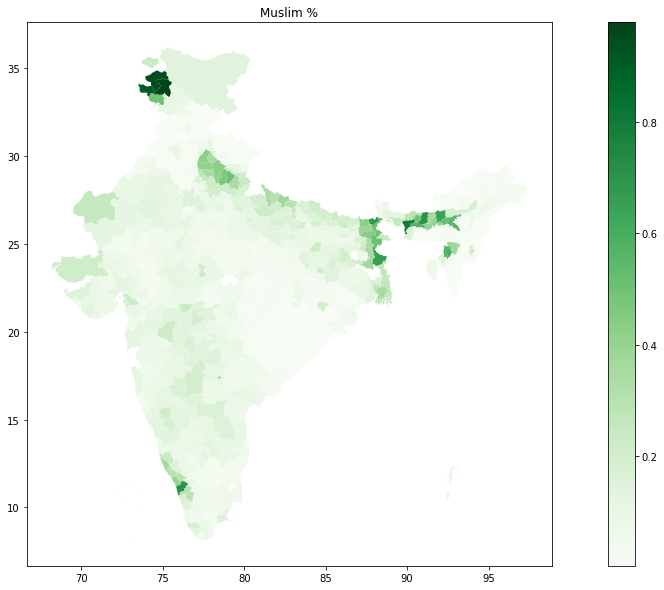

In [325]:
ind_dist.plot(figsize=(20,10), column='muslimpct', cmap='Greens',legend=True)
plt.title('Muslim %')
plt.savefig('/Users/ridhitbhura/Downloads/muslimpct.png')

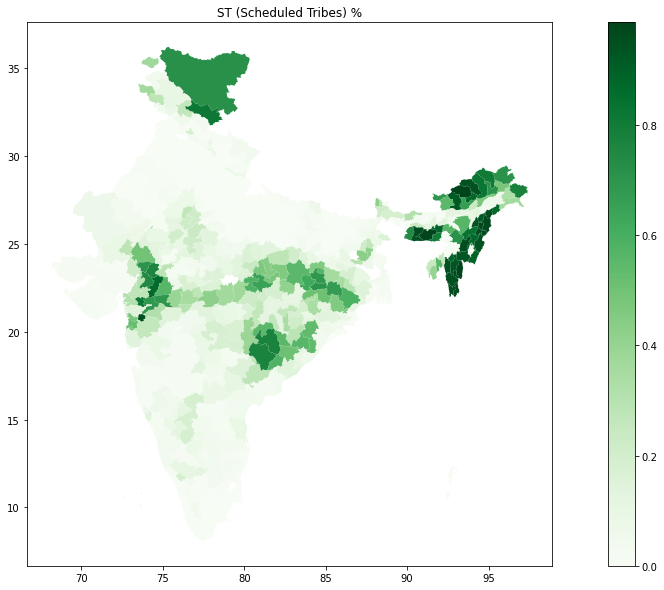

In [326]:
ind_dist.plot(figsize=(20,10), column='stpct', cmap='Greens',legend=True)
plt.title('ST (Scheduled Tribes) %')
plt.savefig('/Users/ridhitbhura/Downloads/stpct.png')